In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv(r'C:\Users\Phuoc Phe Phon\Desktop\pYTHON\data final\dataxeMODEL.csv')
df.drop('Links',axis=1,inplace = True)
df.head()

,Hãng,Giá,Số Chỗ,số Km đã chạy,Tình Trạng,Năm sản Xuất,Hộp số,Nhiên liệu,Xuất sứ,Kiểu Dáng
0,Ford Transit,355.0,6,165000,0,7,Số sàn,Dầu,Việt Nam,Van
1,Chevrolet Colorado,550.0,5,20000,0,3,Tự động,Dầu,Thái Lan,Pick-up (bán tải)
2,Ford Everest,1015.0,7,42000,0,3,Tự động,Dầu,Thái Lan,SUV / Cross over
3,Hyundai Santa Fe,890.0,7,90000,0,5,Tự động,Dầu,Việt Nam,SUV / Cross over
4,Ford Ranger,455.0,5,89668,0,9,Tự động,Dầu,Việt Nam,Pick-up (bán tải)


In [2]:
df.describe()

,Giá,Số Chỗ,số Km đã chạy,Tình Trạng,Năm sản Xuất
count,26305.000000,26305.000000,26305.000000,26305.000000,26305.000000
mean,647.439977,5.764189,58978.414408,0.167459,6.447329
std,743.751689,1.706336,103778.170136,0.373392,5.954381
min,10.000000,2.000000,0.000000,0.000000,0.000000
25%,309.000000,5.000000,162.000000,0.000000,2.000000
50%,500.000000,5.000000,36000.000000,0.000000,5.000000
75%,760.000000,7.000000,78000.000000,0.000000,9.000000
max,25000.000000,16.000000,1000000.000000,1.000000,42.000000


In [3]:
df.columns

Index(['Hãng', 'Giá', 'Số Chỗ', 'số Km đã chạy', 'Tình Trạng', 'Năm sản Xuất',
       'Hộp số', 'Nhiên liệu', 'Xuất sứ', 'Kiểu Dáng'],
      dtype='object')

## LINEARITY
Từ bảng dist ta thấy data Giá theo khuynh hướng exponential hơn là normal distribution từ đó model chúng ta xây dựng sẽ không được chính xác vì đường model sẽ đi theo các đường ngoại lai đó, gây ra hiện tượng các biến bị bias\
Cách giải quyết chúng ta sử dụng phương pháp Quantile (phân vị)

## NO AUTOCORELATION
dữ liệu khá stationary nên không cần thiết phải điều chỉnh


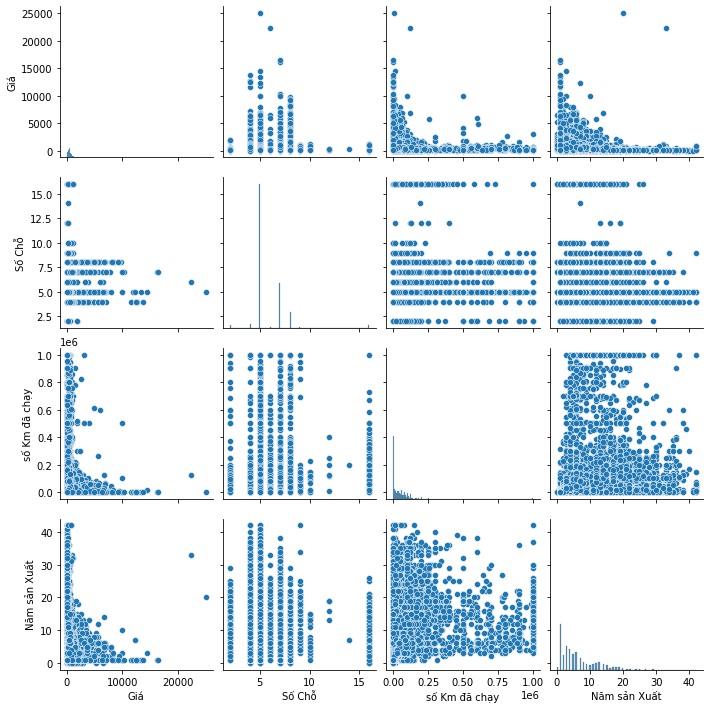

In [15]:
sns.pairplot(df[['Giá', 'Số Chỗ', 'số Km đã chạy', 'Năm sản Xuất']])

## No MULTICOLLINEARITY
(ta nhận thấy rằng giá trị năm sản xuất và tính trạng có thể giải thích cho nhau đây là điều dễ hiểu khi số tuổi = 0 tức là tình trạng tương ứng là 1 (tức mới) cho nên 2 biến này sẽ gây ra hiện tượng đa cộng tuyến)\
các giải pháp \
    - thay 2 biến bằng 1 biến (tượng trưng cho 2 biến)\
    - Xóa bỏ 1 biến\
=> vì biến số tuổi đem lại nhiều thông tin hơn nên ta quyết định bỏ biến tình trạng

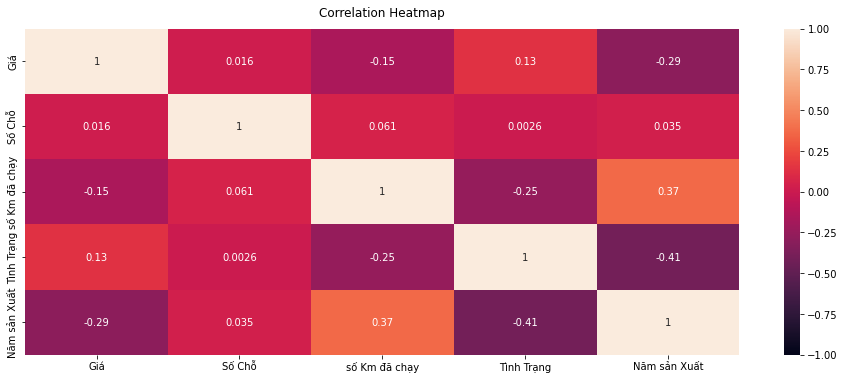

In [16]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);



Nhập tên hãng xe:Ford
Nhập tên dòng xe:Ranger
Bạn muốn chia số km theo số có sẵn hay tự chia trả lời y hoặc ny
1 : 0km 
  2: Dưới 15.000 
  3: 15001 - 30000km  
 4: 30001 - 45000km 
....
Label bạn muốn2
bạn đã chọn label Dưới 15.000


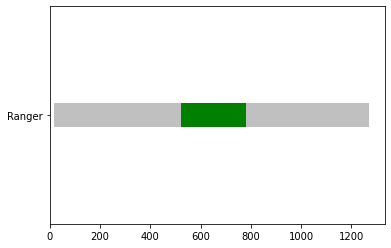

Tổng Số Data thu thập được: 99
Giá giao động trên thị trường: từ 520 triệu đến 780 triệu
Giá Trị trung vị 665 triệu


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 10 19:08:39 2022

@author: Phuoc Phe Phon


"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df=pd.read_csv(r'C:\Users\Phuoc Phe Phon\Desktop\pYTHON\data final\dataxecleaning.csv',delimiter=',')
tuoi =[-1,0.1,15000,30000,45000,60000,75000,90000,105000,
       120000,135000,150000,165000,180000,195000,210000,
       225000,240000,255000,270000,285000,300000,330000,
       345000,360000,375000,390000,405000,420000,435000,
       450000,465000,480000,500000,99999999999]
#thiếu 75001 - 90000km
label = ['0 Km','Dưới 15.000','15001 - 30000km','30001 - 45000km','45001 - 60000km','60001 - 75000km'
         ,'90001 - 105000km','105001 - 120000km','120001 - 135000km','135001 - 150000km'
         ,'150001 - 165000km','165001 - 180000km','180001 - 195000km','195001 - 210000km','210001 - 225000km','225001 - 240000km'
         ,'240001 - 255000km','255001 - 270000km','270001 - 285000km','285001 - 300000km','300001 - 315000km','315001 - 330000km'
         ,'330001 - 345000km','345001 - 360000km','360001 - 375000km','375001 - 390000km','390001 - 405000km','405001 - 420000km'
         ,'420001 - 435000km','435001 - 450000km','450001 - 465000km','465001 - 480000km','480001 - 500000km','trên 500000km']

label2 = list(range(1,35))
df['label']= pd.cut(df['số Km đã chạy'],tuoi,labels=label)
df['Label Đánh số'] = pd.cut(df['số Km đã chạy'],tuoi,labels=label2)
dummy = pd.get_dummies(df['Dòng xe'])
# phân loại dòng xe để 
name = str(input('Nhập tên hãng xe:'))
name2=str(input('Nhập tên dòng xe:'))
name4 = str(input('Bạn muốn chia số km theo số có sẵn hay tự chia trả lời y hoặc n' ))
if name4 == 'y':
    print('1 : 0km \n  2: Dưới 15.000 \n  3: 15001 - 30000km  \n 4: 30001 - 45000km \n....')
    name5=int(input('Label bạn muốn'))
    
else:
    name3 = int(input('Nhập số km đã chạy'))

while (True):
    if name4 == 'y':
        ten= df[(df['Hãng'] ==name) & (df['Dòng xe'] ==name2) &(df['Label Đánh số'] == name5)][['Giá']]
        if ten['Giá'].count() < 20:
            print('Không đủ dữ liệu')
            break
        test1=int(np.percentile(ten, 25))
        test2 =int(np.percentile(ten, 75))
        test3 = int(ten.max())
        test4 = int(ten.min())
        print('bạn đã chọn label '+ str(df[df['Label Đánh số'] == name5]['label'].iloc[0]))
        plt.barh(name2,test3,height=0.1,color='silver')
        plt.barh(name2,test2,height=0.1,color='Green')
        plt.barh(name2,test1,height=0.1,color='silver')
        plt.barh(name2,test4,color='w')
        plt.show()
        print('Tổng Số Data thu thập được: ' +str(ten['Giá'].count()))
        print('Giá giao động trên thị trường: từ ' +str(int(np.percentile(ten, 25)))+ ' triệu đến ' 
              +str(int(np.percentile(ten, 75))) + ' triệu')
        print('Giá Trị trung vị {} triệu'.format(str(int(np.percentile(ten, 50)))))
    elif  name3 == 0 :
        ten= df[(df['Hãng'] ==name) & (df['Dòng xe'] ==name2) &(df['số Km đã chạy'] == name3)][['Giá']]
        if ten['Giá'].count() < 20:
            print('Không đủ dữ liệu')
            break
        test1=int(np.percentile(ten, 25))
        test2 =int(np.percentile(ten, 75))
        test3 = int(ten.max())
        test4 = int(ten.min())
        plt.barh(name2,test3,height=0.1,color='silver')
        plt.barh(name2,test2,height=0.1,color='Green')
        plt.barh(name2,test1,height=0.1,color='silver')
        plt.barh(name2,test4,color='w')
        plt.show()
        print('Tổng Số Data thu thập được: ' +str(ten['Giá'].count()))
        print('Giá giao động trên thị trường: từ ' +str(int(np.percentile(ten, 25)))+ ' triệu đến ' 
              +str(int(np.percentile(ten, 75))) + ' triệu')
        print('Giá Trị trung vị ' +str(int(np.percentile(ten, 50))))
    elif name3 != 0 :
        name4 = int(input('số km tối đa bạn chấp nhận:'))
        ten= df[(df['Hãng'] ==name) & (df['Dòng xe'] ==name2) &(df['số Km đã chạy'] >= name3)&(df['số Km đã chạy'] <= name4)][['Giá']]
        if ten['Giá'].count() < 20:
            print('Không đủ dữ liệu')
            break
        test1=int(np.percentile(ten, 25))
        test2 =int(np.percentile(ten, 75))
        test3 = int(ten.max())
        test4 = int(ten.min())
        plt.barh(name2,test3,height=0.1,color='silver')
        plt.barh(name2,test2,height=0.1,color='Green')
        plt.barh(name2,test1,height=0.1,color='silver')
        plt.barh(name2,test4,color='w')

        plt.show()
        print('Tổng Số Data thu thập được: ' +str(ten['Giá'].count()))
        print('Giá giao động trên thị trường: từ ' +str(int(np.percentile(ten, 25)))+ 
              ' triệu đến ' +str(int(np.percentile(ten, 75))) + ' triệu')
        print('Giá Trị trung vị ' +str(int(ten.median())))
    break
    
# df2=df1.drop(['Kiểu Dáng','Xuất sứ','Nhiên liệu','Hộp số','Số Chỗ',], axis=1)
# df2.to_csv(r"C:\Users\Phuoc Phe Phon\Desktop\pYTHON\data final\dataxepython.csv",encoding = 'UTF-8')
# 
